In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
stations = pd.read_csv('data/station.csv')
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [171]:
trips = pd.read_csv("data/trip.csv", parse_dates=["start_date", "end_date"], 
                     infer_datetime_format=True)
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [172]:
trips['duration'] = trips.duration.apply(lambda x: x/60.0)

In [8]:
start_station_grouped = trips.groupby('start_station_id')
start_station_grouped.size().sort_values(ascending=False).head()

start_station_id
70    49092
69    33742
50    32934
60    27713
55    26089
dtype: int64

In [12]:
stations[stations.id == 70]
## Corresponde a una estación de tren 

,id,name,lat,long,dock_count,city,installation_date
58,70,San Francisco Caltrain (Townsend at 4th),37.776617,-122.39526,19,San Francisco,8/23/2013


In [173]:
# Total de viajes por día.
trips["week_day"] = trips.start_date.dt.weekday_name
grouped_by_weekday = trips.groupby("week_day")
day_rentals = grouped_by_weekday.size()
day_rentals

week_day
Friday       109361
Monday       115873
Saturday      44785
Sunday        38391
Thursday     119089
Tuesday      122259
Wednesday    120201
dtype: int64

In [56]:
# Cantidad de días distintos
day_count = len(trips.start_date.dt.date.unique())
day_count

733

In [55]:
# Cantidad de días distintos por día de la semana
different_dates = pd.DataFrame({"fecha": trips.start_date.dt.date, "week_day": trips.week_day})
week_day_count = different_dates.groupby(["week_day","fecha"]).agg(lambda x:1).reset_index().week_day.value_counts()
week_day_count


Saturday     105
Friday       105
Monday       105
Sunday       105
Thursday     105
Tuesday      104
Wednesday    104
Name: week_day, dtype: int64

In [97]:
# Días de semana: 523
# Días de fin de semana: 210
weekday_count = 523.0
weekend_days_count = 210.0

In [183]:
trips['hour'] = trips.start_date.dt.hour
trips_by_hour = trips.groupby('hour').size()
trips_by_hour


hour
0      2171
1      1189
2       692
3       342
4      1022
5      3449
6     14312
7     43939
8     85864
9     62897
10    30106
11    29141
12    34384
13    31740
14    27156
15    33223
16    59099
17    82705
18    57652
19    29188
20    16527
21    11277
22     7434
23     4450
dtype: int64

In [128]:
hours = [0]*24
hours_weekday = [0]*24
hours_weekend = [0]*24

In [127]:
# Suma de apariciones de cada hora en las listas.
def horas(viaje):
    # Obtengo la hora más cercana por arriba al inicio.
    startf = viaje.start_date.ceil("H")
    # Hora más cercana por abajo al fin.
    endf = viaje.end_date.floor("H")
    rango = pd.date_range(start=startf, end=endf, freq="H").hour
    # Sumamos 1 a las apariciones de cada hora en el rango.
    for h in rango:
        hours_weekday[h]+=1

In [129]:
# Calculo las horas de los días de semana
trips[trips.start_date.dt.dayofweek < 5].apply(horas, axis=1)
hours_weekday

[1675,
 1289,
 1226,
 1167,
 1153,
 1231,
 1848,
 4238,
 11843,
 17360,
 8121,
 5965,
 7818,
 8635,
 8070,
 8097,
 10994,
 16768,
 15830,
 8682,
 5021,
 3502,
 2703,
 2032]

In [100]:
# hours_weekday = [x/weekday_count for x in hours_weekday]
hours_weekend = [x/weekend_days_count for x in hours_weekend]
hours_weekend

[5.319047619047619,
 5.0,
 5.0095238095238095,
 4.6571428571428575,
 4.523809523809524,
 4.457142857142857,
 4.652380952380953,
 5.09047619047619,
 6.438095238095238,
 8.32857142857143,
 11.857142857142858,
 15.795238095238096,
 21.18095238095238,
 25.304761904761904,
 27.833333333333332,
 28.63809523809524,
 28.48095238095238,
 26.047619047619047,
 20.395238095238096,
 14.823809523809524,
 10.538095238095238,
 8.071428571428571,
 6.838095238095238,
 5.8428571428571425]

In [99]:
# Calculo las horas de los fines de semana
trips[trips.start_date.dt.dayofweek > 4].apply(horas, axis=1)
hours_weekend

[1117,
 1050,
 1052,
 978,
 950,
 936,
 977,
 1069,
 1352,
 1749,
 2490,
 3317,
 4448,
 5314,
 5845,
 6014,
 5981,
 5470,
 4283,
 3113,
 2213,
 1695,
 1436,
 1227]

In [45]:
trips.start_date.dt.dayofweek.head()

0    3
1    3
2    3
3    3
4    3
Name: start_date, dtype: int64

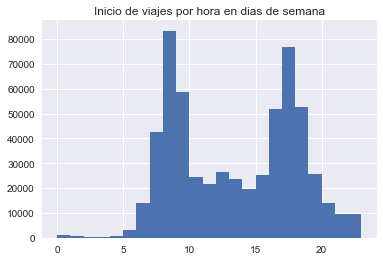

In [89]:
# Distribucion horaria del comienzo de los viajes los dias de semana
trips.start_date[trips.start_date.dt.dayofweek < 5]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(0,24))
    
plt.title("Inicio de viajes por hora en dias de semana")
plt.show()

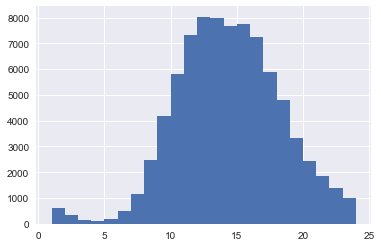

In [10]:
# Distribucion horaria del comienzo de los viajes los dias de fin de semana
trips.start_date[trips.start_date.dt.dayofweek > 4]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))
        
plt.show()

In [125]:
hours_weekday

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

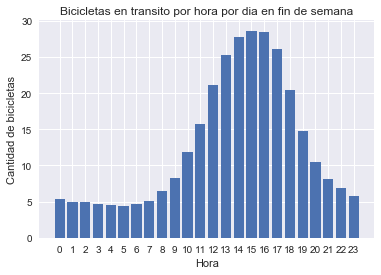

In [124]:
data = pd.Series(hours_weekend)
plt.bar(height=hours_weekend,left=range(0,24))
plt.xticks(range(0,24))
plt.title("Bicicletas en transito por hora por dia en fin de semana")
plt.ylabel("Cantidad de bicicletas")
plt.xlabel("Hora")
plt.show()

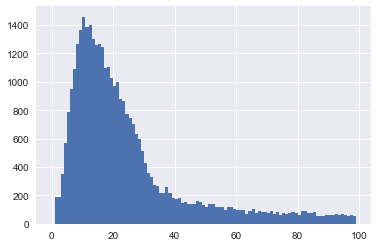

In [158]:
trips[trips.subscription_type == 'Customer'].duration[trips.start_date.dt.dayofweek > 4]\
     .hist(bins=range(0,100))
        

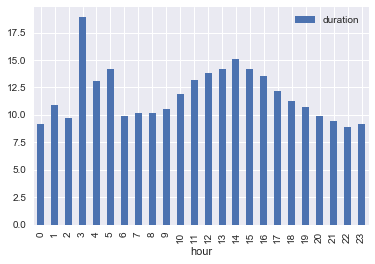

In [199]:
grouped_by_hour = trips.loc[trips.start_date.dt.weekday > 4][['duration', 'hour']].groupby('hour')
grouped_by_hour.median().plot.bar()
# Los datos de las 3 am se van al carajo